
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

The objective of this experiment is to apply LLE on swissroll dataset.

The Swiss roll dataset presents a classic problem, where the objective is to unroll the Swiss roll, by using a non-linear transform. We will also test the robustness of the non-linear dimensionality reduction techniques by introducing noise into the Swiss roll dataset.

#### Keywords

* Manifold
* Swiss roll
* Non - linear Dimensionality reduction
* Geo desic distance
* Local structure

#### Expected Time to complete the experiment : 30 mins

In [0]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_blr_b6/cfus/week_9/module_2_week_9_demo_lab_2.mp4" type="video/mp4">
</video>
""")

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P19A06E_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "981234567" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M2W9_SUN_DL_2" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
   
   print ("Setup completed successfully")
   return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", datetime.datetime.now().date().strftime("%d %b %Y"))
      print("Time of submission: ", datetime.datetime.now().time().strftime("%H:%M:%S"))
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### we will be generating the Swiss roll data 

In [0]:
### importing the required packages
from sklearn.datasets import *
from sklearn import manifold
import matplotlib.pyplot as plt

#### Generating the data

In [0]:
n_samples = 1500
X, color = make_swiss_roll(n_samples)

#### Applying LLE on data

In [0]:

lle_data, _ = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)

In [0]:
type(lle_data)

numpy.ndarray

In [0]:
lle_data.shape

(1500, 2)

#### Plotting the data

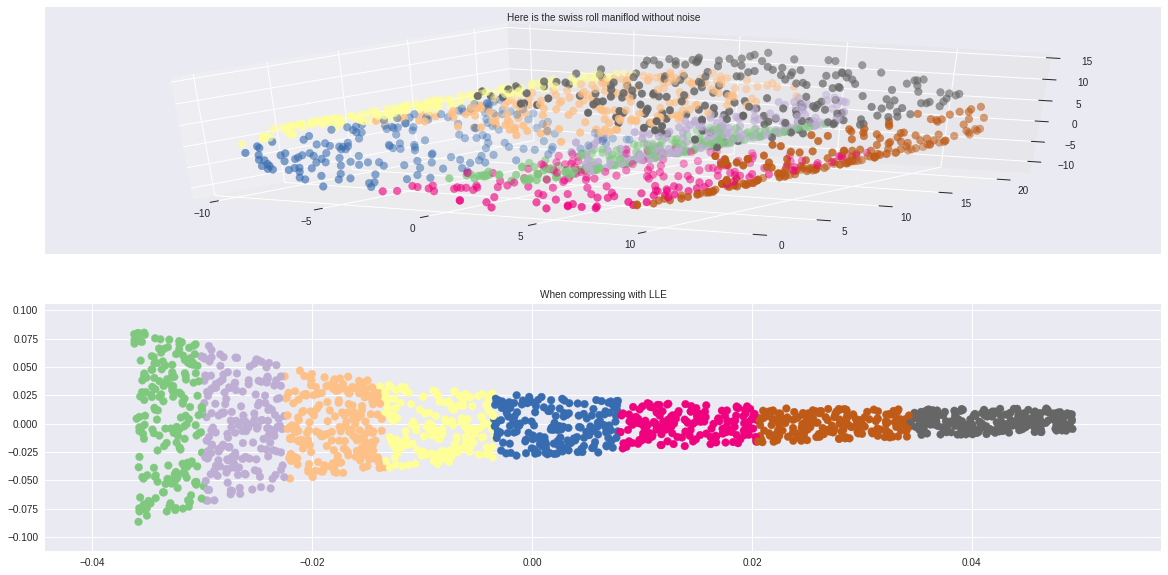

In [0]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize =(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod without noise', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color,cmap="Accent",s=60)
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with LLE', fontsize=10)
ax.scatter(lle_data[:,0],lle_data[:,1],c = color,cmap="Accent",s=60)
plt.show()

#### Now let us generate swiss roll data for 300 samples with some noise in it

In [0]:
noise = 0.01*100 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)

In [0]:
ndata.shape

(300, 3)

#### Lets concatenate the noise data values and original data values

In [0]:
import numpy as np
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)

In [0]:
con_data.shape

(1800, 3)

In [0]:
###Let us apply lle on the data
lle_hdata, _ = manifold.locally_linear_embedding(con_data, n_neighbors=12,
                                             n_components=2)

#### Let us plot the data

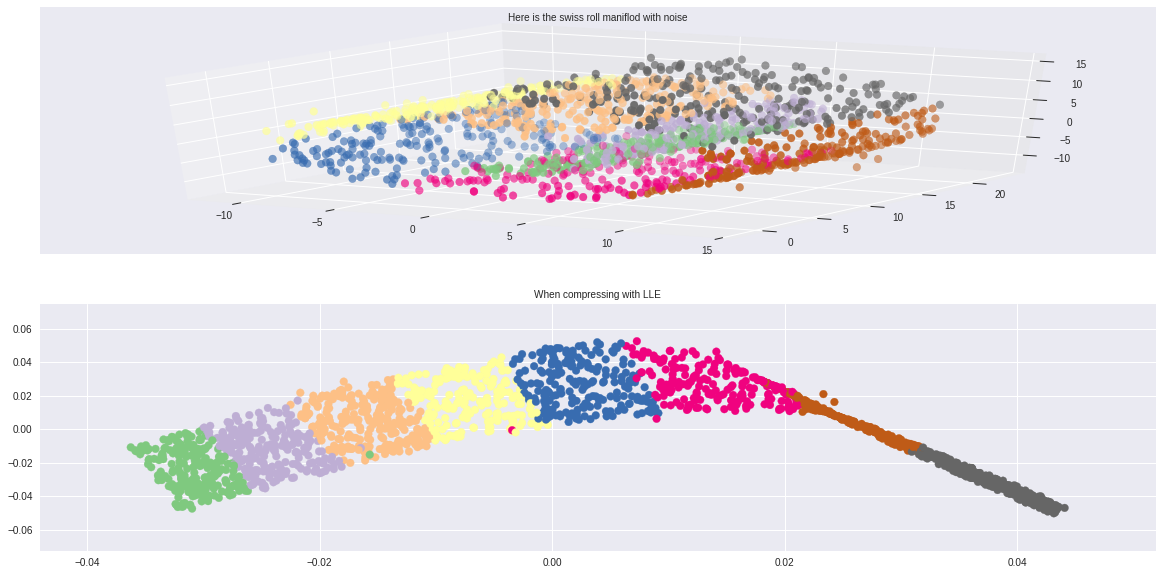

In [0]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with LLE', fontsize=10)
ax.scatter(lle_hdata[:,0],lle_hdata[:,1],c = con_colors,cmap="Accent",s=60)

**Summary:** Locally linear embedding (LLE) seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analysis which are globally compared to find the best non-linear embedding. Notice that this is more robust to failure due to short-circuit errors than Isomap, but the distortion is still significant. 

### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7024
Date of submission:  21 Dec 2018
Time of submission:  04:47:15
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
